# Plot edge circadian score distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def visualize_edge_score(score_file, score_method):
    '''
    score_file: file that contains the edge scores
    score_method: scoring method used to generate the file {'Mean score','Weighted mean score','Max score'}
    '''
    
    score_df = pd.read_csv(score_file, header = 0, sep = '\t')
    
    # obtain tissue names
    score_cols = list(score_df.columns)
    tissues = []
    for i in range(0, len(score_cols)):
        cols_s = score_cols[i].split('_amp')
        if len(cols_s) > 1:
            tissues.append(cols_s[0].split('_')[1])
    tissues = list(np.unique(tissues))
    
    # set plotting parameters
    plt.figure(figsize = (6,6))
    plt.rc('font', size = 15)
    plt.rc('xtick', labelsize = 15)
    plt.rc('ytick', labelsize = 15)

    # compare half-life by whether drug~disease is circadian
    ax = sns.boxplot(x = 'circadian_efficacy', y = 'half_life', data = score_df, showfliers = True)
    ax.set_xlabel('Circadian efficacy', size = 20)
    ax.set_ylabel('Half-life(h)', size = 20)
    plt.tight_layout()
    plt.show()
    
    # set plotting parameters
    f, axes = plt.subplots(5, 1, figsize=(30, 50))
    sns.despine(left = True)
    plt.rc('font', size = 30)
    plt.rc('axes', titlesize = 25)
    plt.rc('axes', labelsize = 25)
    plt.rc('xtick', labelsize = 25)
    plt.rc('ytick', labelsize = 25)
    plt.rc('legend', fontsize = 25)
    # compare edge scores by whether drug~disease circadian 
    meta_class_list = ['G','GC','GD','CG','DG']
    meta_name_list = ['Drug -> Gene -> Disease', 'Drug -> Gene -> Drug -> Disease', 'Drug -> Gene -> Disease -> Disease',
                     'Drug -> Drug -> Gene -> Disease','Drug -> Disease -> Gene -> Disease']
    for i in range(0, len(meta_class_list)):
        # make new dataframe that only contains scores of metapath class 
        meta_class = meta_class_list[i]
        class_cols = [meta_class + '_' + x + '_amp' for x in tissues]
        class_df = score_df.loc[:,class_cols]
        class_df.columns = tissues
        class_df = pd.concat([score_df.circadian_efficacy, class_df], axis = 1)
        melt_df = pd.melt(class_df, id_vars = 'circadian_efficacy', value_vars = tissues)

        # 
        sns.barplot(x = 'variable', y = 'value', hue = 'circadian_efficacy', data = melt_df, ax=axes[i])
        axes[i].set_title(meta_name_list[i], size = 40)
        axes[i].set_xlabel('Tissue', size = 30)
        axes[i].set_ylabel(score_method, size = 30)

    plt.tight_layout()
    plt.show()
    
    return 1

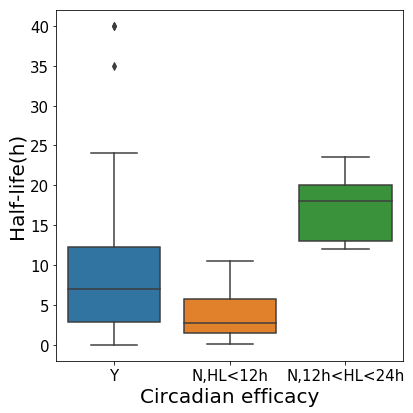

/home/yunhao1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


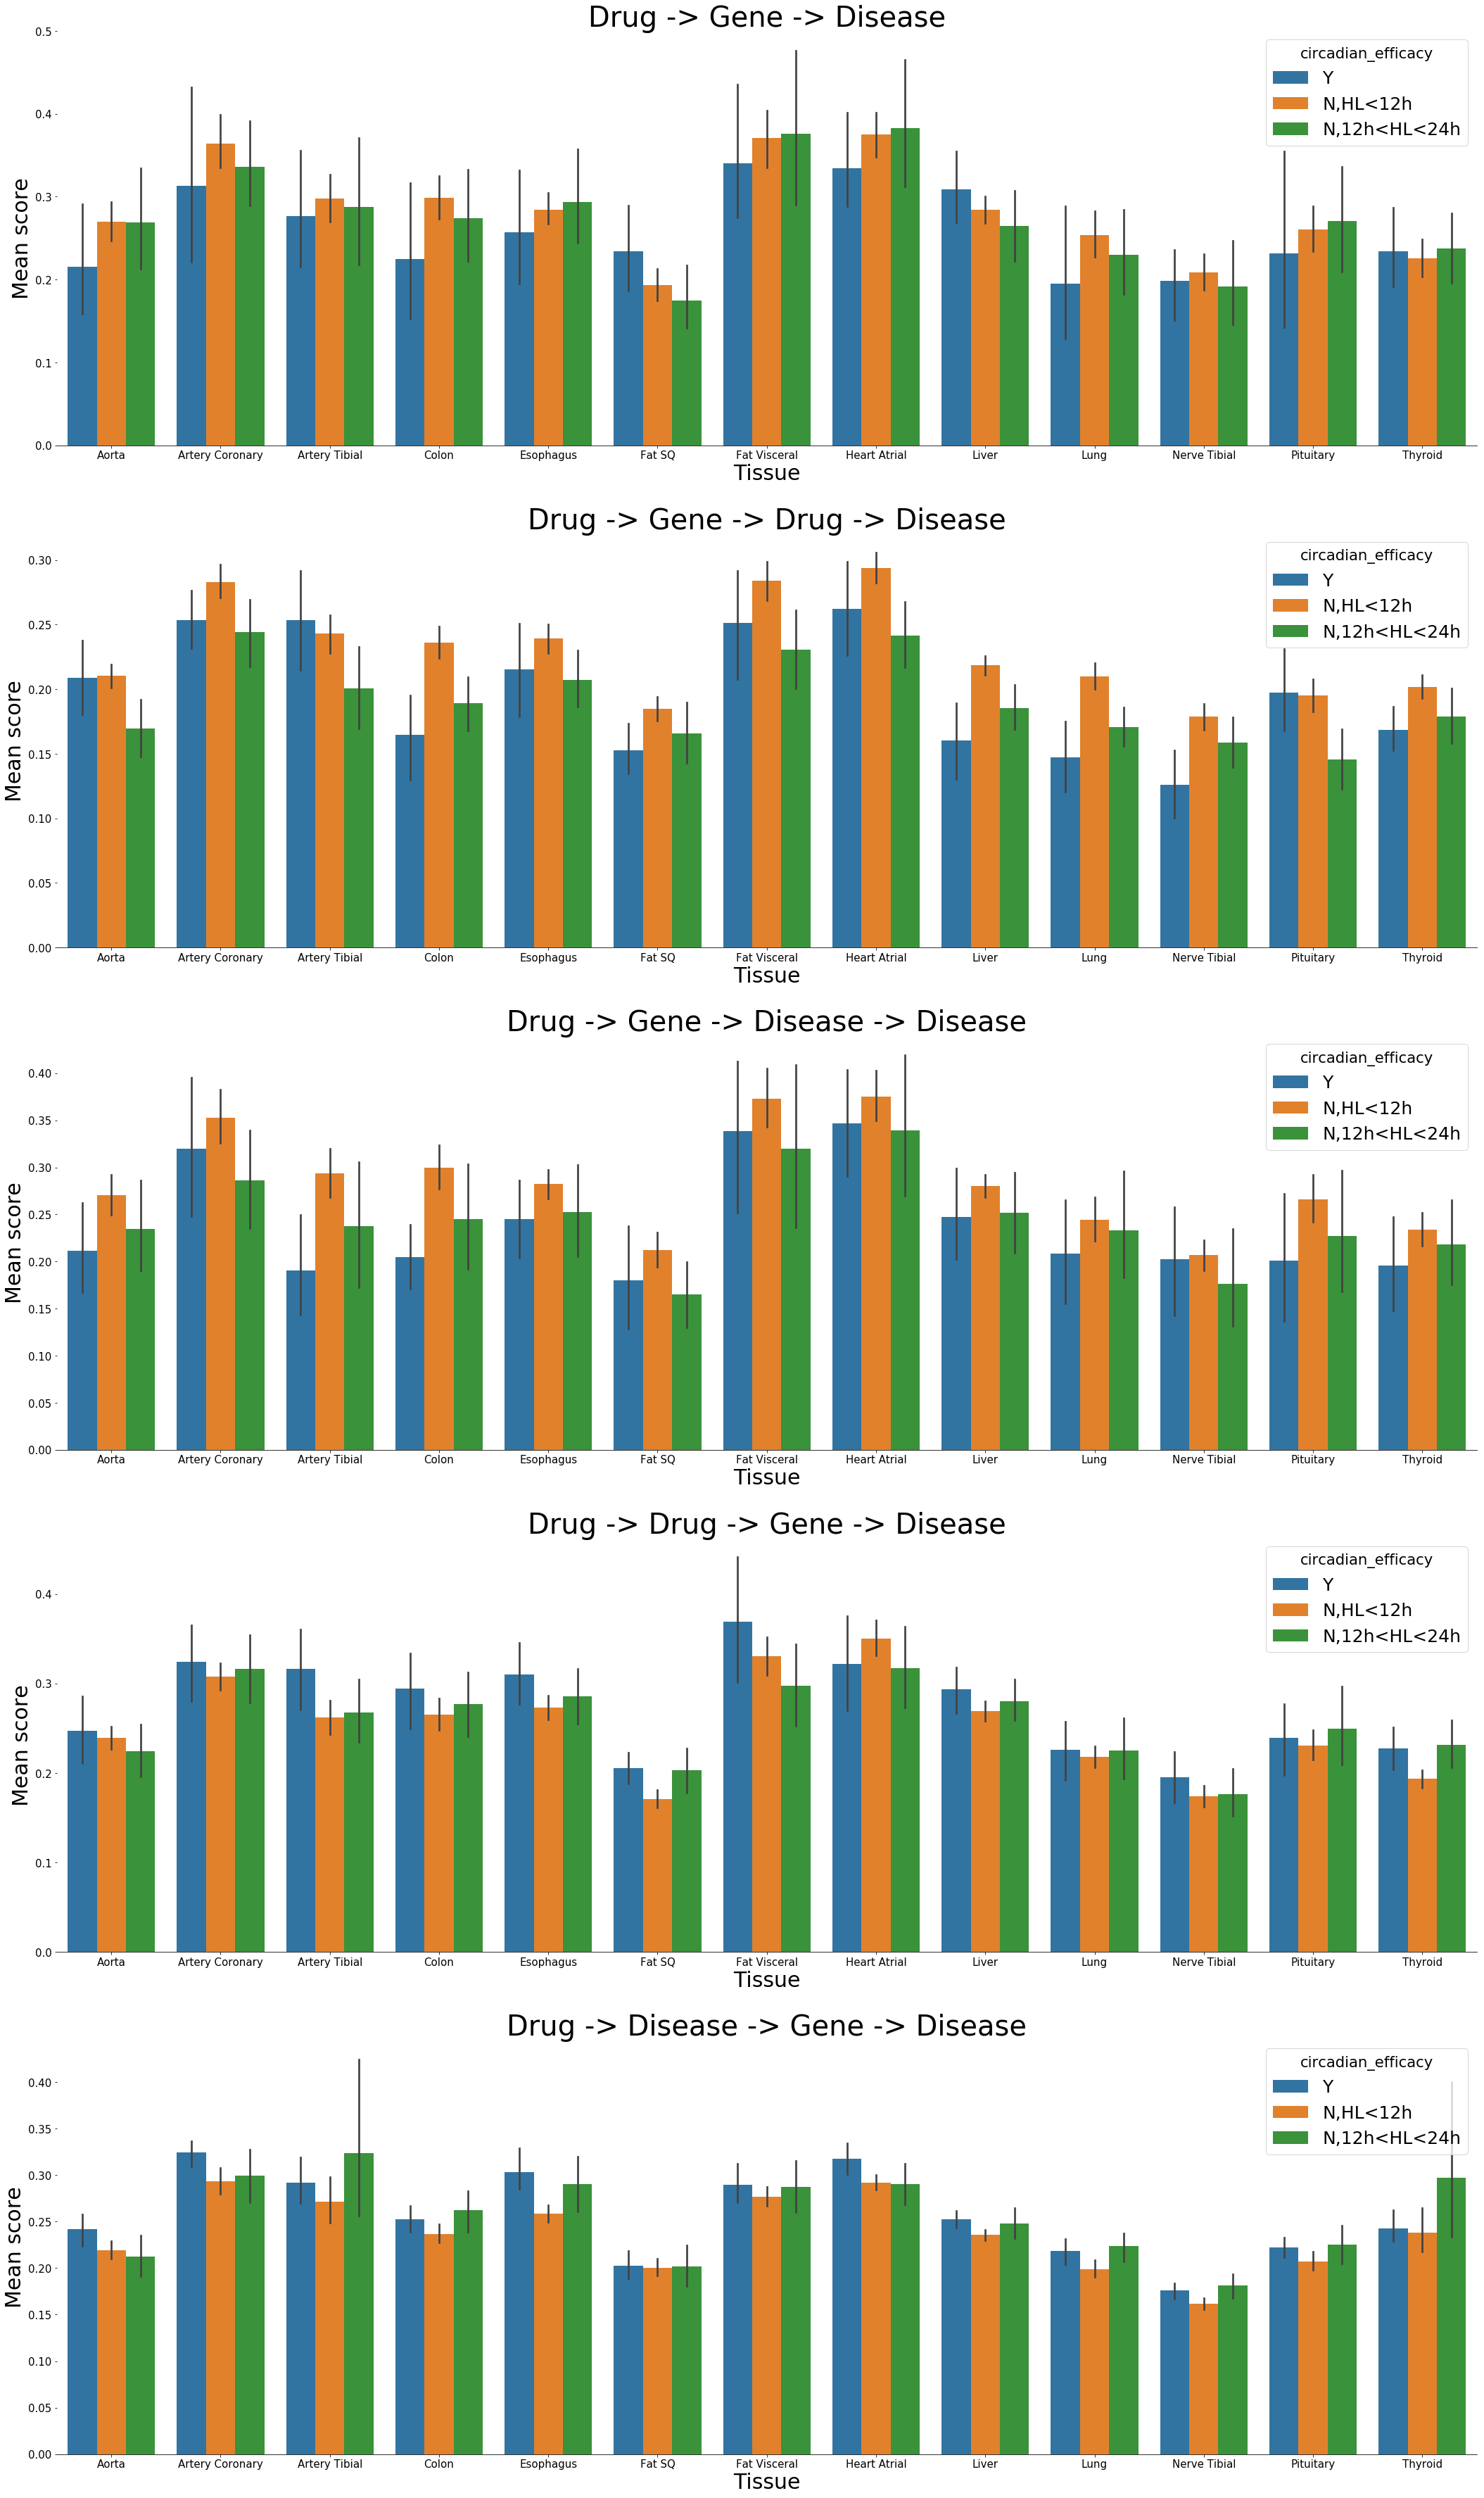

In [3]:
# mean score plots
visual_mean = visualize_edge_score('data/hetionet_edges_mean_circadian_score.tsv', 'Mean score')

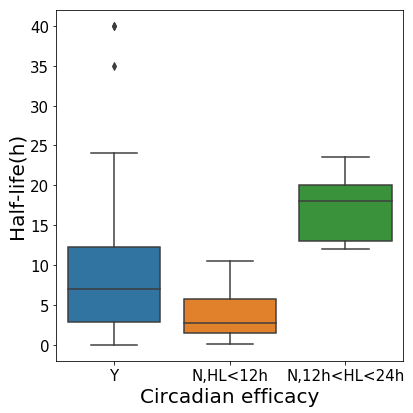

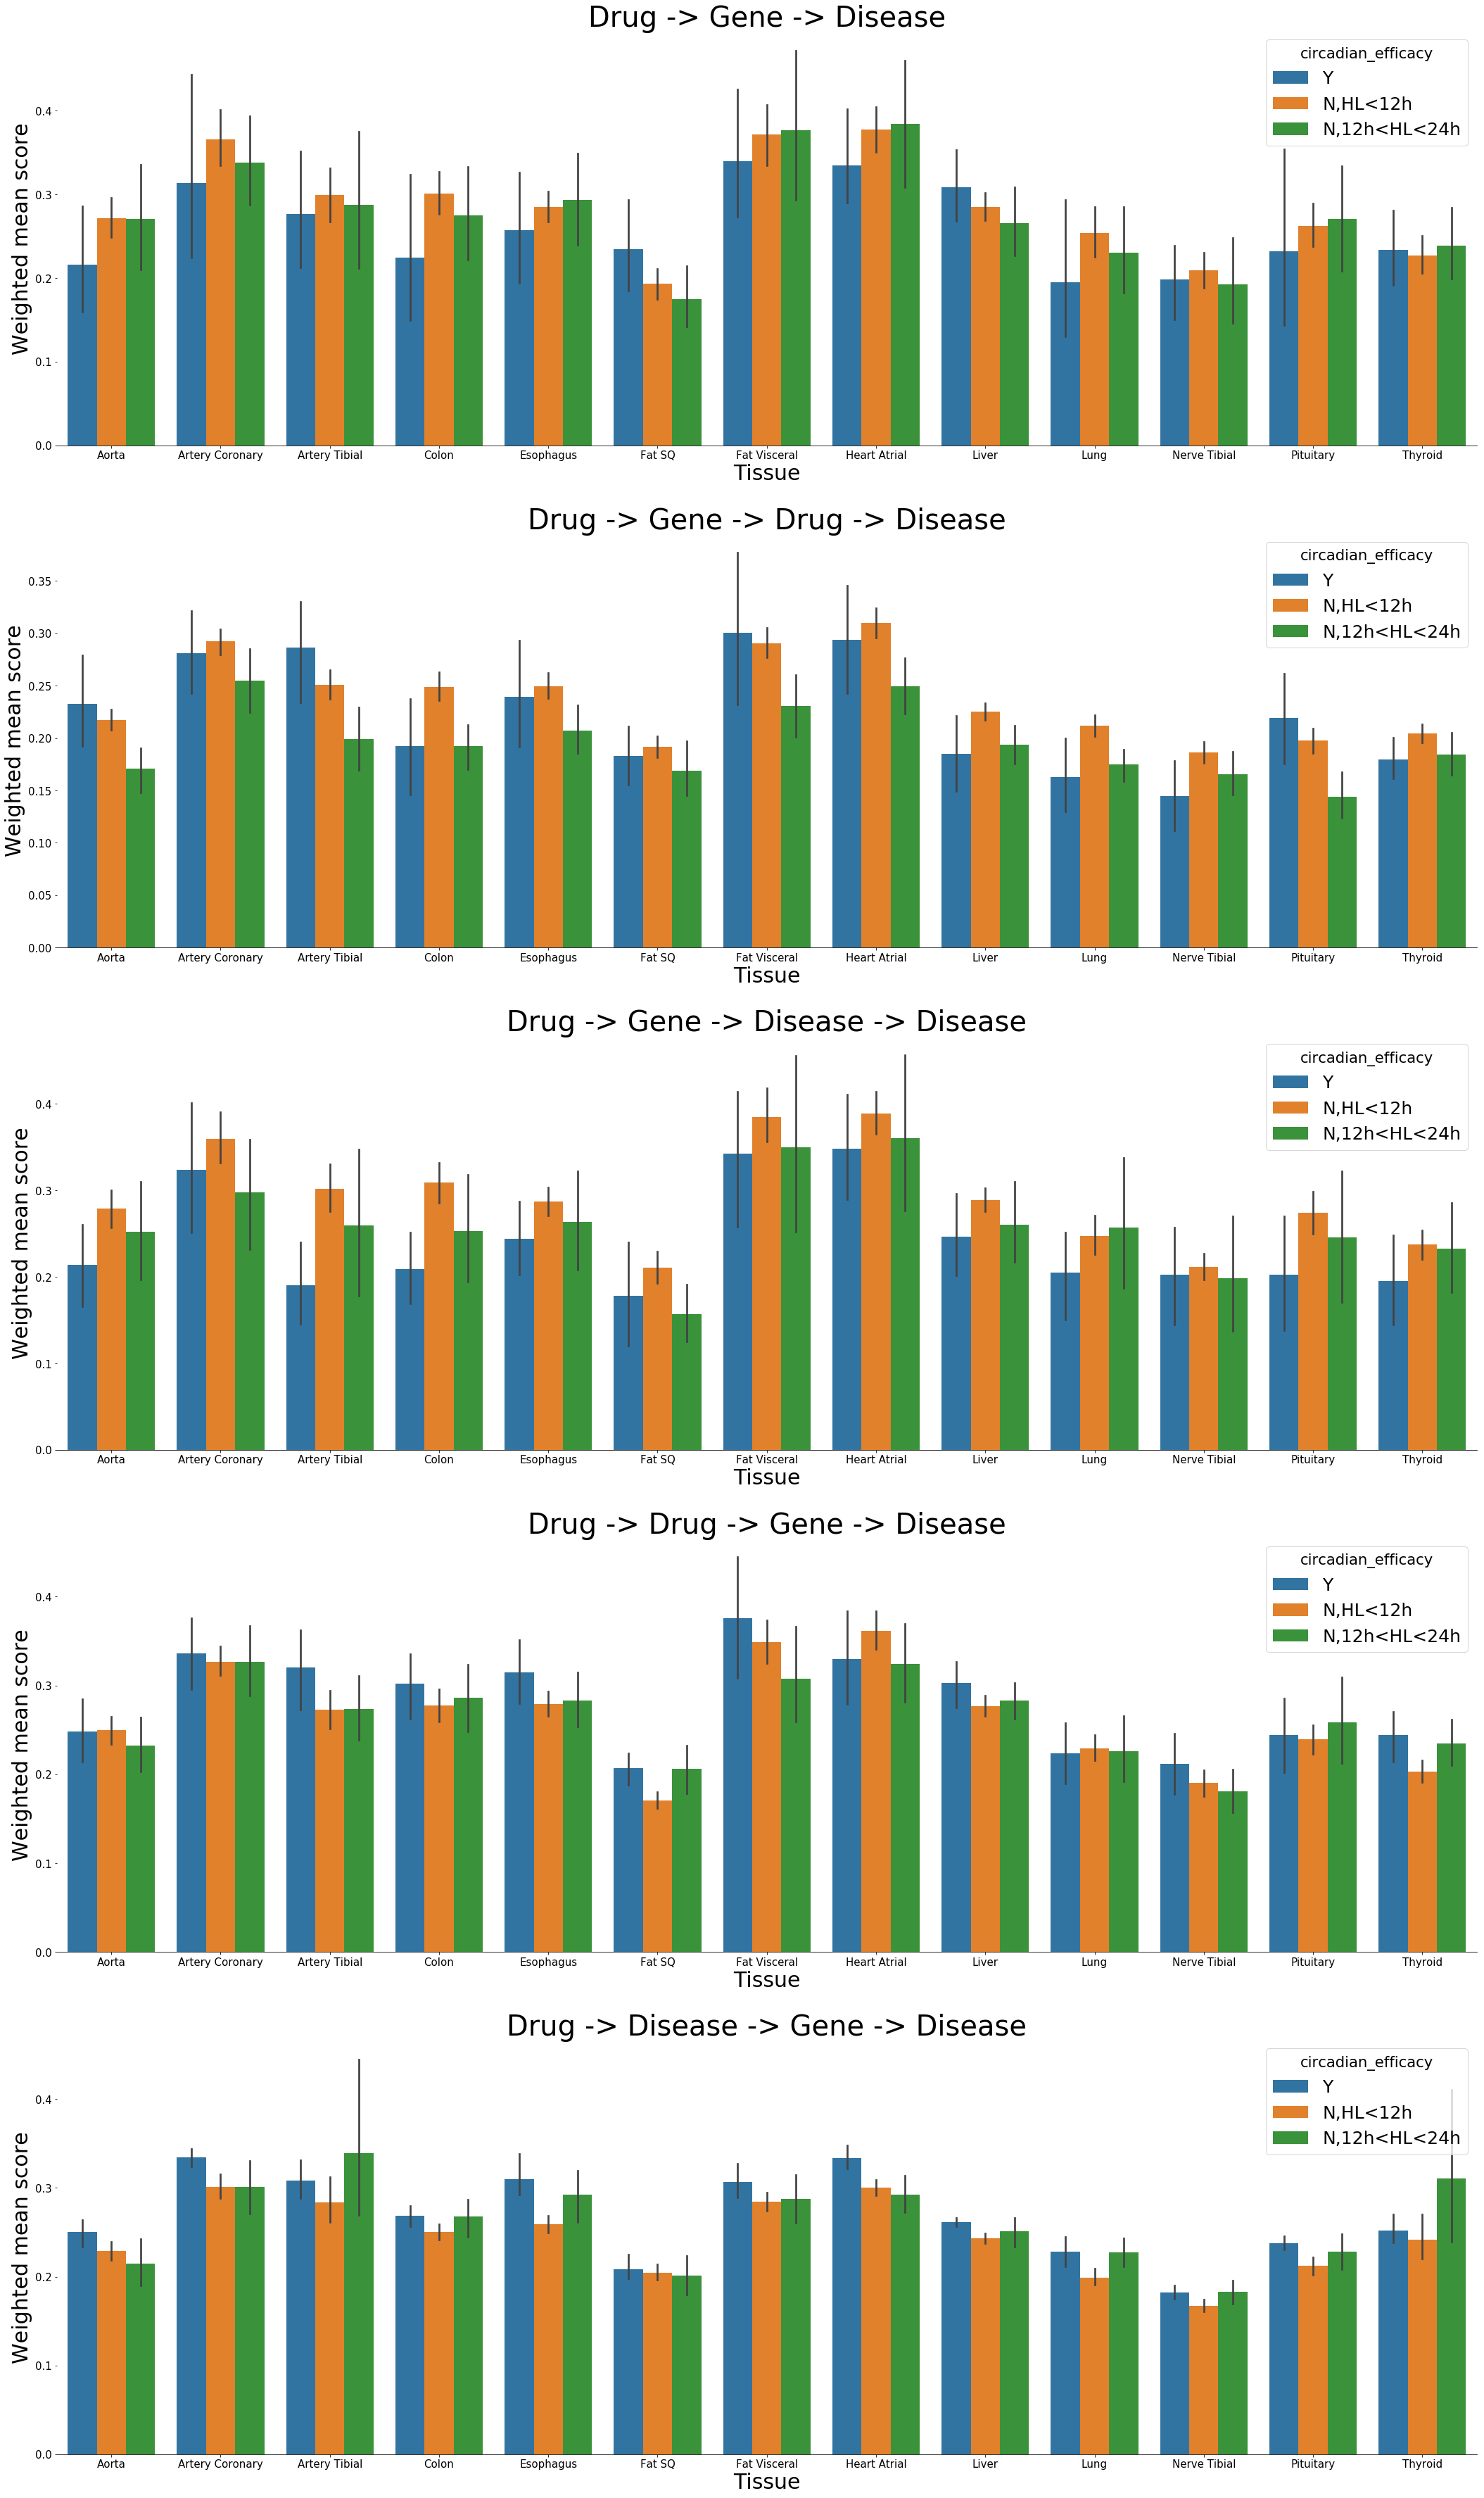

In [4]:
# weighted mean score plots
visual_wmean = visualize_edge_score('data/hetionet_edges_weightedmean_circadian_score.tsv', 'Weighted mean score')

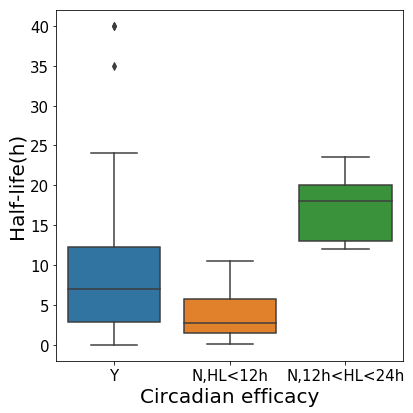

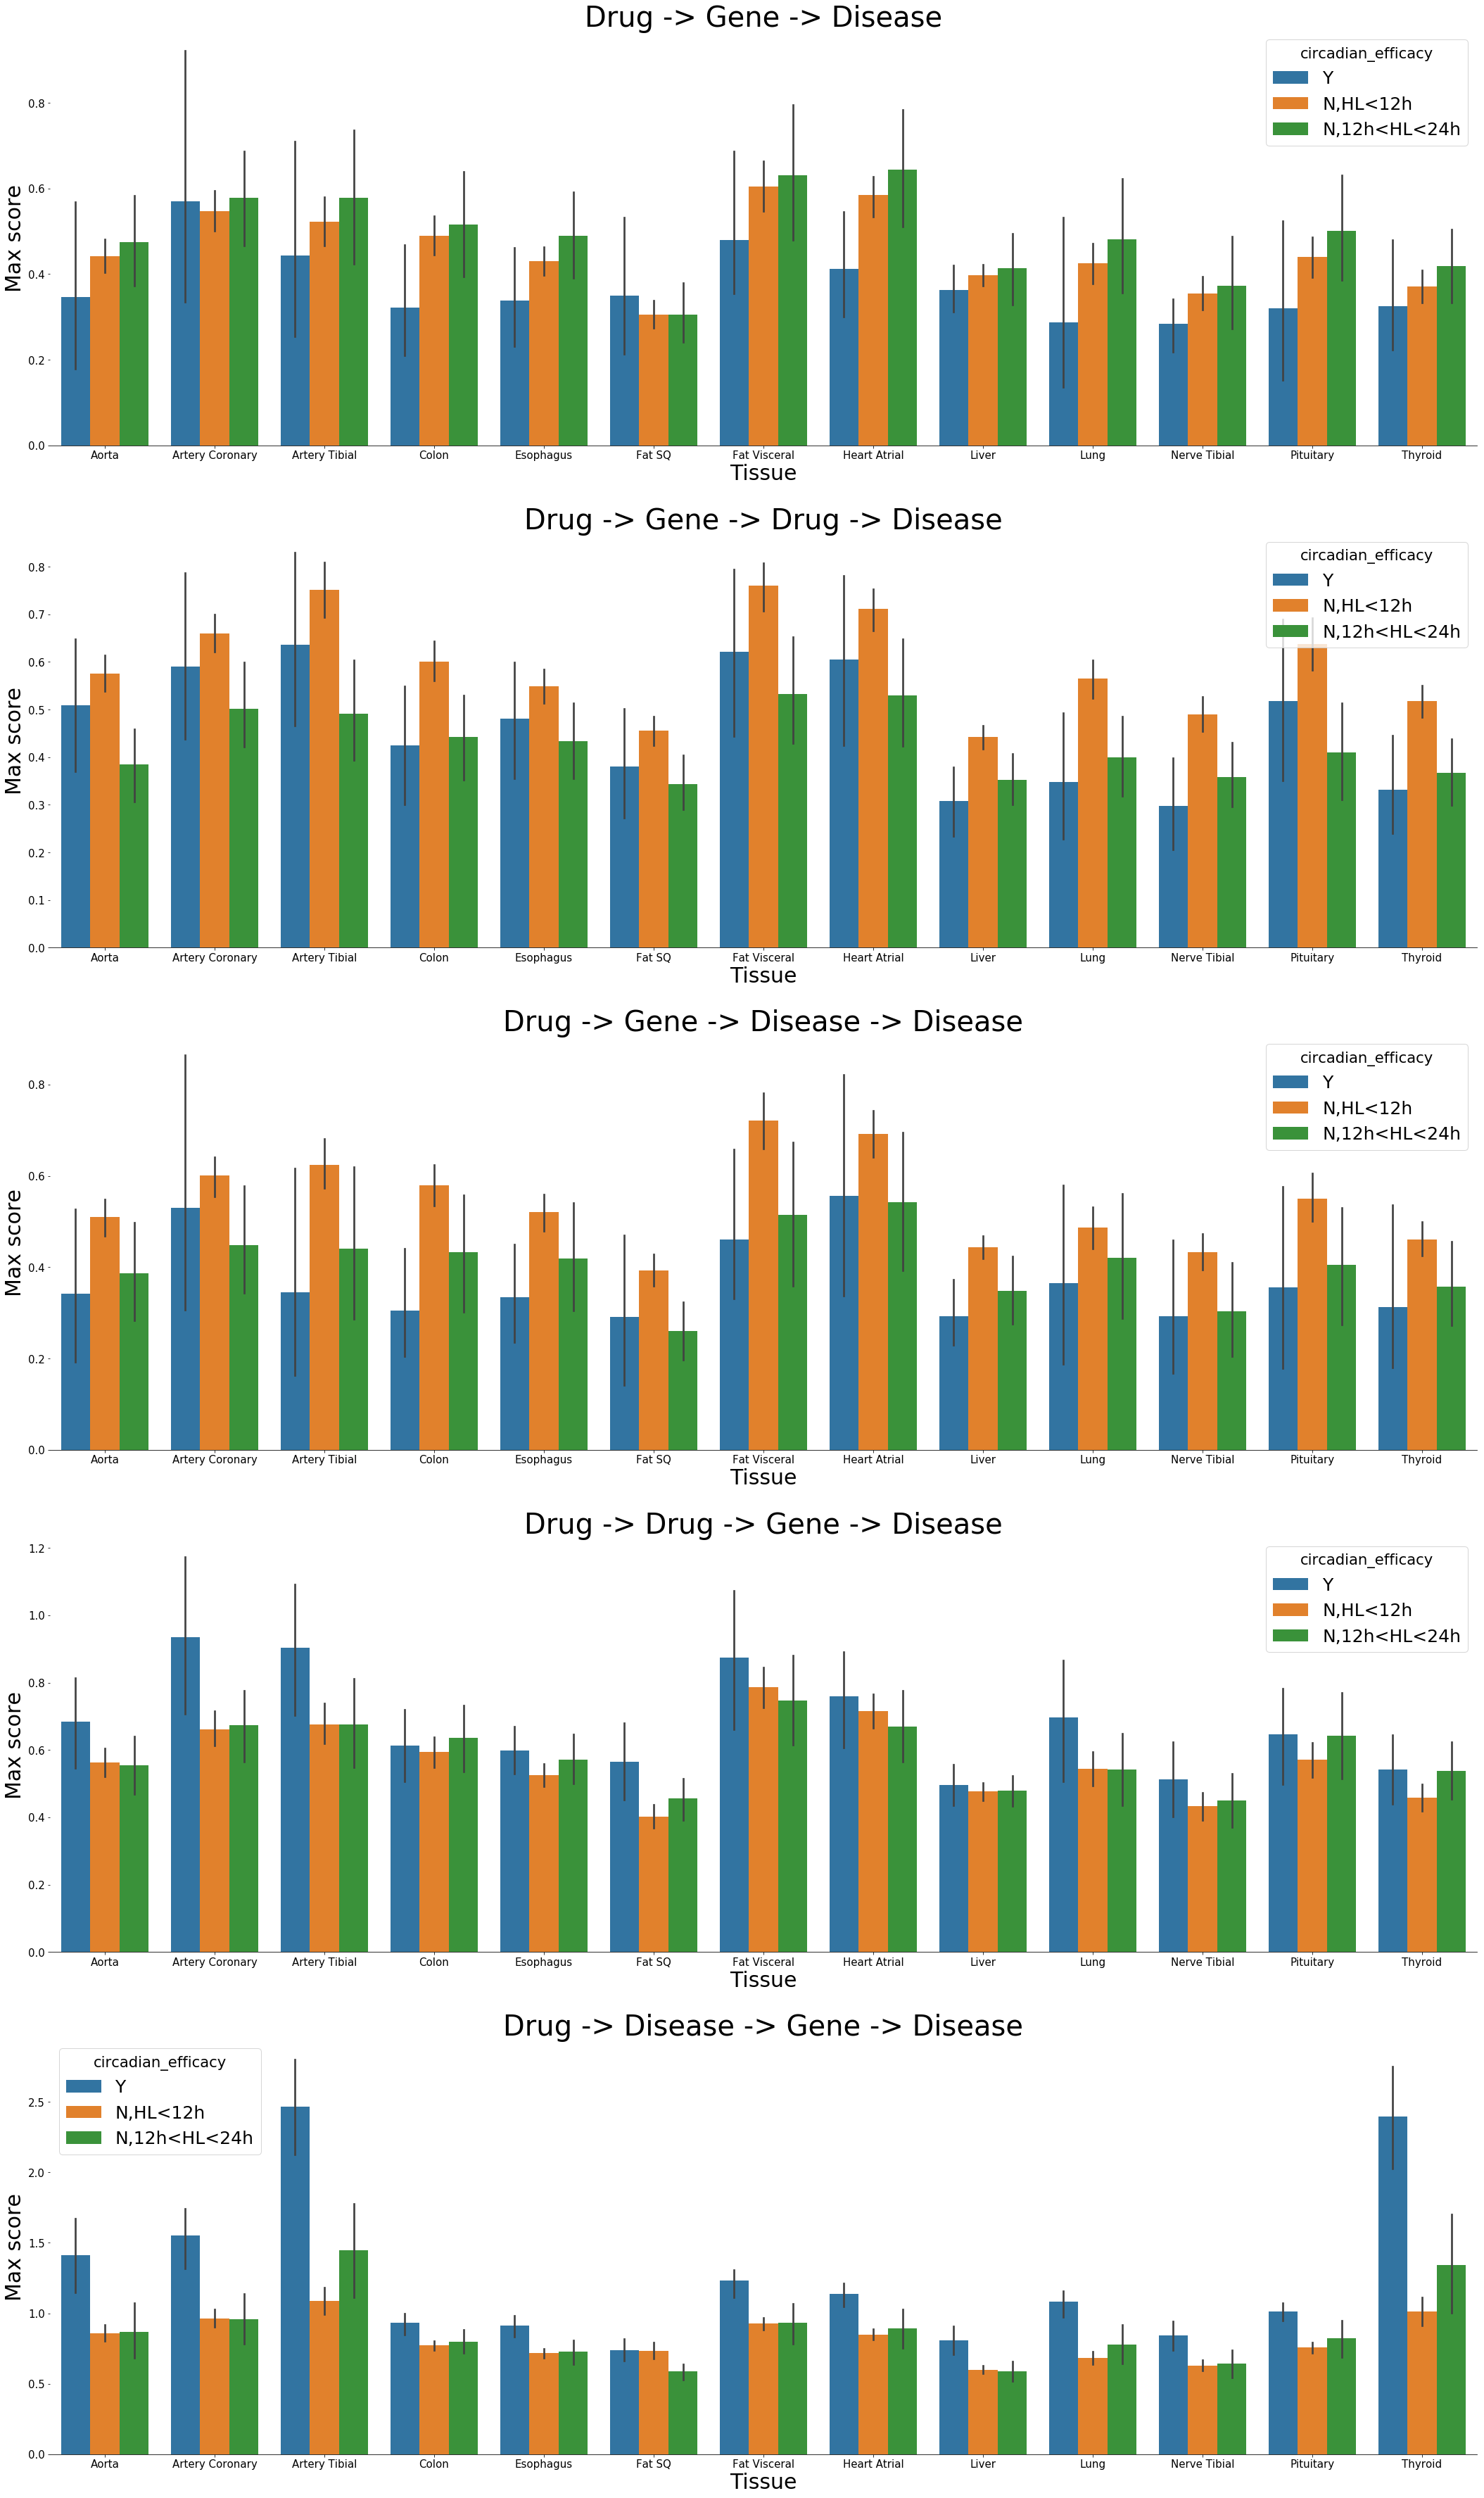

In [5]:
# max score plots
visual_max = visualize_edge_score('data/hetionet_edges_max_circadian_score.tsv', 'Max score')

Based on the results, Maximum scoring method can best differentiate positive and negative drug-disease pairs.

Drug-Disease-Gene-Disease and Drug-Drug-Gene-Disease metapaths show the best performance.